# <font color=#43CD80> VORONOI CODE </font>
<font color= #43CD80> ----------------------------------------------------------- </font>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rc
rc('text', usetex=True)
plt.rcParams['font.size'] = 16
from matplotlib.collections import PolyCollection
import matplotlib.colors as mcolors

import scipy.constants as ct
import ipywidgets

from scipy.spatial import Voronoi, voronoi_plot_2d

import scipy.optimize as optimize
from sympy import var

# system size for a given (npart, rho) configuration
def L(npart, rho):
    l = np.sqrt(npart*2*np.sqrt(3.)/rho)
    return l


In [2]:
import scipy
scipy.__version__

'1.2.0'

In [2]:
%matplotlib --list

Available matplotlib backends: ['qt', 'gtk3', 'osx', 'tk', 'qt5', 'gtk', 'qt4', 'nbagg', 'wx', 'inline', 'notebook']


In [5]:
%matplotlib tk

In [8]:
# read XY positions from xyz#.dat file

xy = pd.read_table('hex_test/2500/xyz0705.dat', skiprows=1, sep = '\s+', header=None,
                    usecols = [0,1], names=['x','y'], index_col=False)


In [9]:
xy

,x,y
0,5.05655,24.915000
1,13.21080,100.050000
2,13.34110,49.723600
3,0.35277,86.888900
4,30.19630,26.993300
5,6.59365,46.761500
6,45.76250,77.800200
7,54.92330,39.289900
8,99.65180,94.844000
9,71.96290,48.080100


In [6]:
len(xy)

2500

In [63]:
# get Voronoi structure out of positions table
vor = Voronoi(xy)

In [65]:
vor.points

array([[   5.05655 ,   24.915   ],
       [  13.2108  ,  100.05    ],
       [  13.3411  ,   49.7236  ],
       ..., 
       [  47.6999  ,   22.2882  ],
       [  96.2394  ,    0.350551],
       [  56.1504  ,   56.1386  ]])

/usr/lib/python3/dist-packages/scipy/spatial/_plotutils.py:17: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()
/usr/lib/python3/dist-packages/scipy/spatial/_plotutils.py:19: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(True)
/usr/lib/python3/dist-packages/scipy/spatial/_plotutils.py:22: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(was_held)


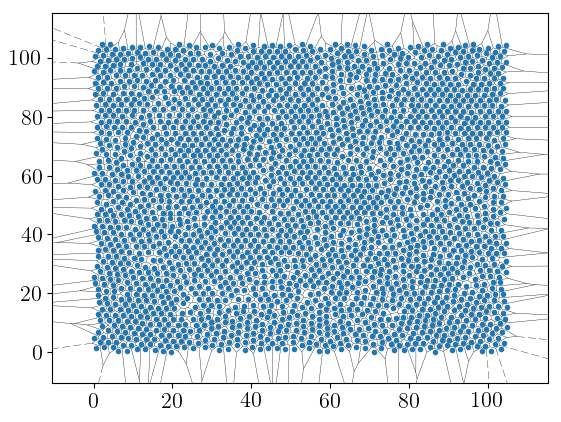

In [26]:
# plot Voronoi diagram with built-in function
voronoi_plot_2d(vor, point_size=1,show_vertices=False, line_width=0.25)

In [7]:
# cell centers positions vs. particle index 
#(equivalent to particle positions)

i = 1
vor.points[i]

array([  8.19829,  50.775  ])

In [8]:
# print position of that particle

print(xy['x'][i])
print(xy['y'][i])


8.19829
50.775


In [9]:
# Voronoi cell index vs. particle number 'i'.
# runs from 1 to npart

vor.point_region[i]

591

In [10]:
# Voronoi list of vertices indexes vs. cell index

i = 591 # cell index
vor.regions[i]

[1292, 926, 927, 923, 1119, 1291]

In [11]:
# Voronoi list vertices positions vs. vertices indexes

vor.vertices[vor.regions[i]]

array([[  7.26035697,  51.5535573 ],
       [  7.02313548,  50.51572793],
       [  7.93611852,  49.63667971],
       [  8.99933938,  49.91296336],
       [  9.3410771 ,  51.12217616],
       [  8.47800752,  51.90805067]])

In [62]:
vor.vertices[vor.regions[1]]

array([[  2.41971633,  22.56948812],
       [ -0.30213278,  21.83215501],
       [ -5.39034786,  23.21656537],
       [  2.27120647,  24.76828663],
       [  2.72870721,  24.3056961 ]])

In [60]:
part_id(1)

508

In [33]:
# Voronoi list of vertices positions vs. particle index

i = 1 # particle number
vor.vertices[vor.regions[vor.point_region[i]]]

array([[  7.26035697,  51.5535573 ],
       [  7.02313548,  50.51572793],
       [  7.93611852,  49.63667971],
       [  8.99933938,  49.91296336],
       [  9.3410771 ,  51.12217616],
       [  8.47800752,  51.90805067]])

In [5]:
# NOT NECESSARY TO LOAD
# get particle number vs. Voronoi index 'i'
def part_id(v_id):
    p_i = np.where(vor.point_region == v_id)[0][0]
    return p_i

In [142]:
# notice that part_id is the inverse function of vor.point_region

i = 591
part_id(vor.point_region[i])

591

In [8]:
npart = 5000
xy_av = av_xy(800,990)

## <font color=crimson>BASE $XY$ AND VORONOI FUNCTIONS</font>

In [3]:
# all code requires definition of 'npart' 

# READ POSITIONS FROM TEXT FILE generated from MD simulations
def read_xy(path, iframe):
    #nombre = 'hex_test/'+ str(npart)+'/rho0840/accel08/xyz'+ '{0:04d}'.format(iframe) +'.dat'
    nombre = path+'xyz'+ '{0:04d}'.format(iframe) +'.dat'
    # read using numpy:
    xy = np.loadtxt(nombre, skiprows=1, usecols=(0,1))
    # read using pandas:
    #    xy = pd.read_table(nombre, skiprows=1, sep = '\s+', header=None,
    #                    usecols = [0,1], names=['x','y'], index_col=False)
    return xy

def av_xy(path,init_frame, end_frame):
    nframes = end_frame - init_frame + 1
    xy_av = read_xy(path, init_frame)
    for i in range(init_frame+1, end_frame+1):
        xy_av = xy_av + read_xy(path, i)
    xy_av = xy_av / nframes
    return xy_av
        
        
# FILTER OUTER CELLS, returns a numpy array
def inner_xy(xy,LX, X_off, LY, Y_off):
    return list(filter(lambda x: x[0] > X_off and x[1]>Y_off and x[0]<LX-X_off and x[1]<LY-Y_off,
                       [[xy[i][0], xy[i][1]] for i in range(npart)]))



#################################################################################
# Build INNER CELLS list. BEYOND THIS POINT USAGE REQUIRES vor=Voronoi(xy)   ####
#################################################################################


# OBTAINS cell vertices for ONE simulation PARTICLE, 
# USAGE: pseudo_cell(particle number, x size, x border, y size, y border)
# RETURNS an array of 2D lists (xy vertices positions) if all vertices are inner
# for outer cells returns VOID

def pseudo_cell_xy(vor,p_id, LX, X_off, LY, Y_off):
    b = vor.points[p_id]
    if b[0] < X_off or b[0] > LX-X_off or b[1] < Y_off or b[1] > LY - Y_off:
        c = []
    else:
        c = vor.vertices[vor.regions[vor.point_region[p_id]]]
        if np.any(c.T[0] < X_off) == True or np.any(c.T[0] > LX-X_off) or np.any(c.T[1] < Y_off) == True or np.any(c.T[1] > LY-Y_off):
            c = []
    return c


# OBTAINS THE ENTIRE LIST OF INNER CELLS
# USAGE: inner(particle_simulation_index, vertices_positions_2Dcoords_array)
# RETURNS a numpy array of objects: [particle number, [pseudo_cell_xy] ] with n_inner length
# INPUTS from pseudo_cell_xy, which inputs from Voronoi

def inner_cells(vor, LX, X_off, LY, Y_off):
    global n_inner
    inner = list(filter(lambda x: len(x[1])>3 ,
                          [ [i, pseudo_cell_xy(vor,i, LX, X_off, LY, Y_off)] for i in range(npart)]))
    n_inner = len(inner)
    return inner

#
#def Voronoi_inner(xy):
#    global vor,inner
#    vor = Voronoi(xy)
#    inner = inner_cells(LX, X_off, LY, Y_off)
#


#############################################################################################
#############################################################################################

# GRAPHS FOR VORONOI TESSELLATION, only inner cells
# USAGE: graf_vor(inner), with inner a numpy array of inner_cells objects
# RETURNS 2 graphs
# INPUTS FROM inner_cells

def graf_vor(inner, LX, LY):
           
    # Build polygon type list
    polygon_type = [len(inner[i][1]) for i in range(n_inner)]
            
##########################################
### POLYGON TYPE HISTOGRAM ###############
##########################################

    # bar plot the histogram
    fig_hist, ax0 = plt.subplots(1,figsize=(7,7/ct.golden))
    
            
    # build distr. f of polygons
    sides_distr = np.histogram(polygon_type, bins =np.arange(3,15) )
        
    plt.xlim(np.min(polygon_type)-1,np.max(polygon_type)+1)
    plt.ylim(0, 1.1*np.max(sides_distr[0]))
    
    plt.ylabel('$N$')
    plt.xlabel('polygon')   

    # Compute & Display ratio of hexagons
    hex_ratio = sides_distr[0][3]/n_inner
    # define text box
    plt.text(3.25, 1.0*np.max(sides_distr[0]), 'hexagons (\%): ' + '{:.2%}'.format(hex_ratio),
             size=12, ha="left", va="center",
             bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),)
             )
  
    plt.bar(sides_distr[1][:-1], height=sides_distr[0], align='center')
    
##########################################

    # Build color list
    colors_built = ['w' for i in range(n_inner)]
    
    for i in range(len(inner)):
        if len(inner[i][1]) == 4:
            colors_built[i] = 'dodgerblue'
        elif len(inner[i][1]) == 5:
            colors_built[i] = 'mediumseagreen'
        elif len(inner[i][1]) == 6:
            colors_built[i] = 'lemonchiffon'
        elif len(inner[i][1]) == 7:
            colors_built[i] = 'tomato'  
        elif len(inner[i][1]) == 8:
            colors_built[i] = 'pink' 

    
    fig_cells, ax = plt.subplots(1,figsize=(9.5,9.5))
    
    ax.set_ylim([0,LX])
    ax.set_xlim([0,LY])
    plt.xlabel(r'$x$',fontsize=20)
    plt.ylabel(r'$y$', fontsize=20)

    
    # Build colored Tessellation
    
    col = PolyCollection([inner[i][1] for i in range(n_inner)],
                         linewidths=0.2, facecolor= colors_built)
    col.set_edgecolors('k')
    graf = ax.add_collection(col)
    plt.scatter(vor.points.T[0],vor.points.T[1], marker='o', lw=0, s=(72./fig_cells.dpi)**2,c='k')
    return fig_cells

# TODO: graph simulation snapshot from above, with circles of size = sigma (particle diameter)


In [6]:
# QUITAR DEL CALCULO DE DENSIDAD LAS LLAMADAS A VORONOI (POCO EFICIENTE E INNECESARIO)
npart = 5000

base_path = '/home/fvega/Codigos/MD/'
#extra_path = 'hex_test/' + str(npart) + '/'
extra_path = ''

path = base_path + extra_path 

xy = read_xy(path, 800)

#xy = av_xy(800,990)

density = 0.840
LX = L(npart, density) 
# The 3 previous lines allow for precise input of LX (if LX=LY)

X_off = 2. # this is the width of the border layer to discard

vor = Voronoi(xy)

inner = inner_cells(vor, LX=LX,X_off=X_off,LY=LX,Y_off=X_off)

graf = graf_vor(inner, LX, LX )



In [7]:
###################################################        
# PARTICLE DENSITY FUNCTIONS          #############
###################################################

# density is output in units of average density (npart/(LX*LY))
# OLD function, calculates density out of Voronoi structure (extremely inefficient)
#
#def rho_xy(nxbin, nybin, iframe): 
#    global dxbin, dybin
#    # set init BINS MATRIX
#    rho = np.zeros((nxbin,nybin))
#    dxbin = LX/nxbin
#    dybin = LY/nybin
#    
#    Voronoi_inner(iframe) # Voronoi tessellation only inner cells
#    for i in range(n_inner): # loop over all inner particles
#        ip = inner[i][0]
#        ix = int(np.floor((vor.points[ip][0]-X_off)/dxbin))
#        iy = int(np.floor((vor.points[ip][1]-Y_off)/dybin))
#        rho[ix][iy] = rho[ix][iy] + 1
#    # scale according to Jeff's rho2D definition
#    rho = (2*np.sqrt(3.)*rho/(dxbin*dybin))
#    
#    return rho

# NEW DENSITY FUNCTION , more efficient, just uses xy readings from MD .dat files
def rho(xy,  LX, X_off, LY, Y_off, nxbin, nybin): 
    global dxbin, dybin
    # set init BINS MATRIX
    rho = np.zeros((nxbin,nybin))
    dxbin = (LX-2*X_off)/nxbin
    dybin = (LY-2*Y_off)/nybin
    
    for i in range(len(xy)): # loop over all inner particles
        ix = int(np.floor((xy[i][0] - X_off)/dxbin))
        iy = int(np.floor((xy[i][1] - Y_off)/dybin))
        if ix >= 0 and ix < nxbin and iy >= 0 and iy <nybin:
            rho[ix][iy] = rho[ix][iy] + 1
    # scale according to Jeff's rho2D definition
    rho = (2*np.sqrt(3.)*rho/(dxbin*dybin))
    
    return rho

# OLD FUNCTION (density time average), uses rho(frame) to average
# NEW procedure should use rho(av_xy) instead
#def tav_xy_rho(init_frame,end_frame):
#    av_rho = np.zeros((nxbin+2,nybin+2))
#    nframes = end_frame - init_frame + 1
#    for ifile in range(init_frame, end_frame + 1):
#        av_rho = av_rho + true_xy_rho(nxbin,nybin,ifile)
#    av_rho = av_rho/nframes
#    return av_rho
#

# build the part_rho*part_rho field
# OLD SCHEME for radial distribution calculation setup. To delete when new procedure completed
#def x_circle(y,r):
#    return np.sqrt(y**2-r**2)
#
#def radial_rho(nrbin):
#    rmax = (LX -X_off)**2 + (LY-Y_off)**2
#    drbin = rmax/nrbin
#    for i in range(nrbin):
#        ybin_max = int(np.floor(nrbin*drbin))
#        yb = 0; j = 0
#        while yb < ybin_max:
#            ix = int(np.floor((x_circle(yb, drbin*(i+1))-X_off)/dxbin))
#            j = j + 1
#            yb = dybin * j
#    return r_rho

# bin the 'bin distance', so as to see 
def bin_distance(ref_bin,f_bin):
    return 0

In [33]:

def xy_make_bins(nxbin, nybin):
    global dxbin, dybin
    # set init BINS MATRIX
    rho = np.zeros((nxbin,nybin))
    dxbin = (LX-2*X_off)/nxbin
    dybin = (LY-2*Y_off)/nybin


# DISCRETE DISTANCE FUNCTION: obtains distance between square bins
def ddf(ij,ijprime):
    return np.sqrt(((ij[0]-ijprime[0])*dxbin)**2 + ((ij[1]-ijprime[1])*dybin)**2)
    
# DISCRETE DISTANCE FUNCTION: obtains distance between square bins
def r_make_bins(rmax, nrbin):
    global drbin
    rho_r = np.zeros(nrbin)
    drbin = 1.0 * rmax/nrbin

def get_bin(ij,ijprime):
    rbin = int( np.floor(ddf(ij, ijprime)/drbin))
    return rbin

def count_r_bins(rmax, nxbin, nybin, nrbin):
    global nr
    nr = np.zeros(nrbin)
    xy_make_bins(nxbin,nybin)
    r_make_bins(rmax, nrbin)
    for i in range(nxbin):
    #i=0
        #for j in range(nybin):
        j=0
        for jj in range(j+1,nybin):
            rbin = get_bin([i,j],[i,jj])
            nr[rbin] = nr[rbin] + 1
#                print(jj)
#            for ii in range(i+1,nxbin):
#                for jj in range(nybin):
#                    rbin = get_bin([i,j],[ii,jj])
#                    nr[rbin] = int(nr[rbin] + 1)


In [34]:
npart = 5000
density = 0.840
LX = L(npart, density) 
LY = LX
X_off = 2. # this is the width of the border layer to discard
Y_off =X_off
nxbin=12
nrbin=10

#xy_make_bins(nxbin,nxbin)
#r_make_bins(1.5*LX,10)
#get_bin([0,0],[nxbin,nxbin])

count_r_bins(1.5*LX, nxbin, nxbin, nrbin)

In [36]:
nr

array([ 12.,  24.,  24.,  24.,  24.,  24.,   0.,   0.,   0.,   0.])

In [32]:
11*12

132

In [49]:
plt.figure(11,figsize=(5,5))
plt.imshow(rhoxy)
plt.show()

In [18]:
# HOW TO DEFINE A FUNCTION OF TWO SYMBOLIC VARIABLES
x, y = var('x y')
def f(x,y):
    return x**2+y**2-1
for i in range(10):
    print(f(i*0.1,y))

y**2 - 1
y**2 - 0.99
y**2 - 0.96
y**2 - 0.91
y**2 - 0.84
y**2 - 0.75
y**2 - 0.64
y**2 - 0.51
y**2 - 0.36
y**2 - 0.19


In [81]:
################################
# Build NEIGHBORS LIST #########
################################
def neighbor_cells(iframe):
    Voronoi_inner(iframe)
    neighbors = [[] for i in range(npart)]
    print('no. of inner particles: ', n_inner)
    for k in range(n_inner):
        part = inner[k][0]
        # cn: coordination no. of current particle (= the number of vertices in its cell)
        cn = len(vor.regions[vor.point_region[part]])
        # list of vertices for current particle
        verts = vor.regions[vor.point_region[part]]
        # initialize list  (raw_neighbors) of lists (raw_neighbors[i])
        # sublists will end up being the list of vertices in the cell of the repeated vertex
        raw_neighbors = [[] for i in range(cn)]
    
        # for each vertex, search its repetitions in the other cells, but only in inner ones
        for j in range(cn):
            # a closest neighbor is defined as a particle that has a common a cell vertex with the ref. part.
            raw_neighbors[j]=list(filter(lambda x: any(np.array(vor.regions[vor.point_region[x]]) == verts[j])
                                     , [inner[i][0] for i in range(n_inner)] ))
        # (each raw_neighbors is now the list of particles whose cell contains current vertex)
    
        # collapse into a single list
        for j in range(1,cn):
            raw_neighbors[0]+=raw_neighbors[j]
        # filter out self-repetitions
        raw_neighbors[0]= list(filter(lambda x: x != part, raw_neighbors[0]))
        # remove duplicates from shared vertices among neighbor cells (set) and sort (sorted)  
        neighbors[part] = sorted(np.array(list(set(raw_neighbors[0]))))
        if k%100==0: print('iteracion: ', k)


In [82]:
neighbor_cells(999)

no. of inner particles:  2243
iteracion:  0
iteracion:  100
iteracion:  200
iteracion:  300
iteracion:  400
iteracion:  500
iteracion:  600
iteracion:  700
iteracion:  800
iteracion:  900
iteracion:  1000
iteracion:  1100
iteracion:  1200
iteracion:  1300
iteracion:  1400
iteracion:  1500
iteracion:  1600
iteracion:  1700
iteracion:  1800
iteracion:  1900
iteracion:  2000
iteracion:  2100
iteracion:  2200


In [106]:
# ORIENTATIONAL CORRELATION FUNCTION


psi = np.zeros((nxbin, nybin)) # initialize psi matrix

for i in range(len(inner)):
    part = inner[i][0]
    icn = 1./len(neighbors[part]) 
    xyk = vor.points[part]
    rk = np.linalg.norm(xyk)
    
    xbin = int(np.floor(xyk[0]/dbin))
    ybin = int(np.floor(xyk[1]/dbin))
    
    # k is the reference particle, j is the neighbor
    for j in range(cn):
        xyj = vor.points[neighbors[part][j]]
        rj= np.linalg.norm(xyj)
        thetajk = np.arccos(np.dot(xyk,xyj)/(rj*rk))
        psi[xbin][ybin] += (np.exp(thetajk*6j)*icn)